<a href="https://colab.research.google.com/github/PriyankaGona/MachineLearning-Assignments/blob/master/hw2_model4_testdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Required headers and libraries are imported
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

Using TensorFlow backend.


In [0]:
# Required variables are declared
batch_size = 32
num_classes = 10
epochs = 100

#Loading and shuffling Cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, y_train = shuffle(x_train, y_train, random_state=0)


split_index = int(0.8 * x_train.shape[0])


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

# Dividing data into training and validation sets
train_x = x_train[:split_index]
train_y = y_train[:split_index]

validate_x = x_train[split_index:]
validate_y = y_train[split_index:]

print("\nnumber of samples in training set: ",len(train_x))
print("number of samples in validation set: ",len(validate_x))

input_shape = train_x.shape[1:]
print("Shape of images: ",input_shape)

170500096/170498071 [==============================] - 25s 0us/step

number of samples in training set:  40000
number of samples in validation set:  10000
Shape of images:  (32, 32, 3)


In [0]:
#Defining the model with more layers.
def getModel(input_shape):
	model = Sequential()

	model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_x.shape[1:]))
	model.add(Activation('relu'))

	model.add(Conv2D(32, (3, 3)))
	model.add(Activation('relu'))

	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.25))

	model.add(Conv2D(64, (3, 3), padding='same'))
	model.add(Activation('relu'))

	model.add(Conv2D(64, (3, 3)))
	model.add(Activation('relu'))

	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Dropout(0.25))

	model.add(Conv2D(128, (2, 2), padding='same'))
	model.add(Activation('relu'))

	model.add(Conv2D(128, (2, 2)))
	model.add(Activation('relu'))

	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Dropout(0.25))

	model.add(Flatten())

	model.add(Dense(1024))
	model.add(Activation('relu'))

	model.add(Dropout(0.5))

	model.add(Dense(num_classes))
	model.add(Activation('softmax'))
	   
	 
	model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])
	
	return model

In [0]:
#Model is trained
def train_model(model):
  # Data Augmentation
	datagen = ImageDataGenerator(rotation_range=0, width_shift_range=0.1,height_shift_range=0.1,fill_mode='nearest', horizontal_flip=True, vertical_flip=False, rescale=None)

	datagen.fit(train_x)

	for e in range(10):
		batches = 0
		for x_batch, y_batch in datagen.flow(train_x, train_y, batch_size=40000):
			model.fit(x_batch, y_batch)
			batches += 1
			if batches >= 1:
				# we need to break the loop by hand because
				# the generator loops indefinitely
				break
				
				
	return model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(validate_x, validate_y))

In [0]:
# Model is tested in this method on the validation data
def test_model(validate_x, validate_y):
	
  score = model.evaluate(validate_x, validate_y, verbose=0)
	
  print('Validation loss:', score[0])
  print('Validation accuracy:', score[1])

In [0]:
#Plotted the Validation accuracy against number of epochs
def plot_training_graph(training_history):
	
	plotaccuracy = plt.plot(range(1,epochs+1), training_history.history['acc'],range(1,epochs+1), training_history.history['val_acc'])

	plt.xlabel('Number of epochs')
	plt.ylabel('Accuracy')

	plt.legend(('Train Accuracy','Test Accuracy'))

	plt.show(plotaccuracy)

	print('\n\nvalidation loss:', training_history.history['val_loss'][-1])
	print('validation accuracy:', training_history.history['val_acc'][-1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
40000/40000 [==============================] - 22s 541us/step - loss: 1.9628 - acc: 0.2563
Epoch 1/1
40000/40000 [==============================] - 17s 427us/step - loss: 1.6703 - acc: 0.3751
Epoch 1/1
40000/40000 [==============================] - 18s 454us/step - loss: 1.5523 - acc: 0.4269
Epoch 1/1
40000/40000 [==============================] - 17s 421us/step - loss: 1.4694 - acc: 0.4619
Epoch 1/1
40000/40000 [==============================] - 17s 423us/step - loss: 1.4030 - acc: 0.4906
Epoch 1/1
40000/40000 [==============================] - 17s 425us/step - loss: 1.3404 - acc: 0.5131
Epoch 1/1
40000/40000 [==============================] - 17s 421us/step - loss: 1.2971 - acc: 0.5305
Epoch 1/1
40000/40000 [==============================] - 1

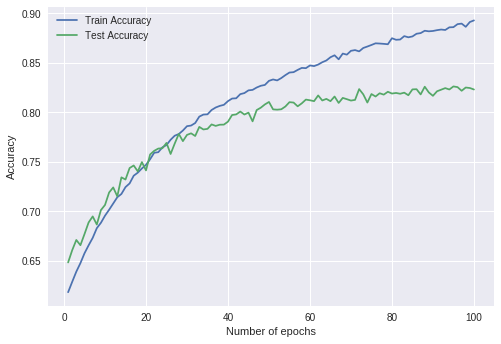



validation loss: 0.5437827802181244
validation accuracy: 0.823


In [0]:
# calling all the methods
model = getModel(input_shape)
History = train_model(model)
test_model(validate_x, validate_y)
plot_training_graph(History)

In [0]:
# Model is tested in this method on the test data
scores = model.evaluate(x_test, y_test, verbose = 1)
print('Test Loss:', scores[0])
print('Test Accuracy:', scores[1]* 100)

10000/10000 [==============================] - 1s 129us/step
Test Loss: 0.5523526725053787
Test Accuracy: 82.55
